In [1]:
import torch
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
import DRLPDE.neuralnets as neuralnets
import importlib

mpl.rcParams['figure.dpi'] = 600
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']
plt.rcParams['font.size'] = 8

In [17]:
steps = [0, 10, 100, 1000, 10000]
true_L2norm = np.sqrt(100.9340)

direct1 = 'Direct'
direct2 = 'Direct_lr3'
direct3 = 'Direct_lr4'

stochastic1 = 'Stochastic'
stochastic2 = 'Stochastic_lr3'
stochastic3 = 'Stochastic_lr4'

with open('experiments/'  + direct1 + '_errors.pickle', 'rb') as f:
    direct_errors1 = pickle.load(f)
with open('experiments/'  + direct2 + '_errors.pickle', 'rb') as f:
    direct_errors2 = pickle.load(f)
with open('experiments/'  + direct3 + '_errors.pickle', 'rb') as f:
    direct_errors3 = pickle.load(f)

with open('experiments/'  + stochastic1 + '_errors.pickle', 'rb') as f:
    stochastic_errors1 = pickle.load(f)
with open('experiments/'  + stochastic2 + '_errors.pickle', 'rb') as f:
    stochastic_errors2 = pickle.load(f)
with open('experiments/'  + stochastic3 + '_errors.pickle', 'rb') as f:
    stochastic_errors3 = pickle.load(f)

In [18]:
L2direct_errors1 = np.sqrt(direct_errors1[:,0,0])/true_L2norm
L2direct_errors2 = np.sqrt(direct_errors2[:,0,0])/true_L2norm
L2direct_errors3 = np.sqrt(direct_errors3[:,0,0])/true_L2norm

L2stochastic_errors1 = np.sqrt(stochastic_errors1[:,0,0])/true_L2norm
L2stochastic_errors2 = np.sqrt(stochastic_errors2[:,0,0])/true_L2norm
L2stochastic_errors3 = np.sqrt(stochastic_errors3[:,0,0])/true_L2norm

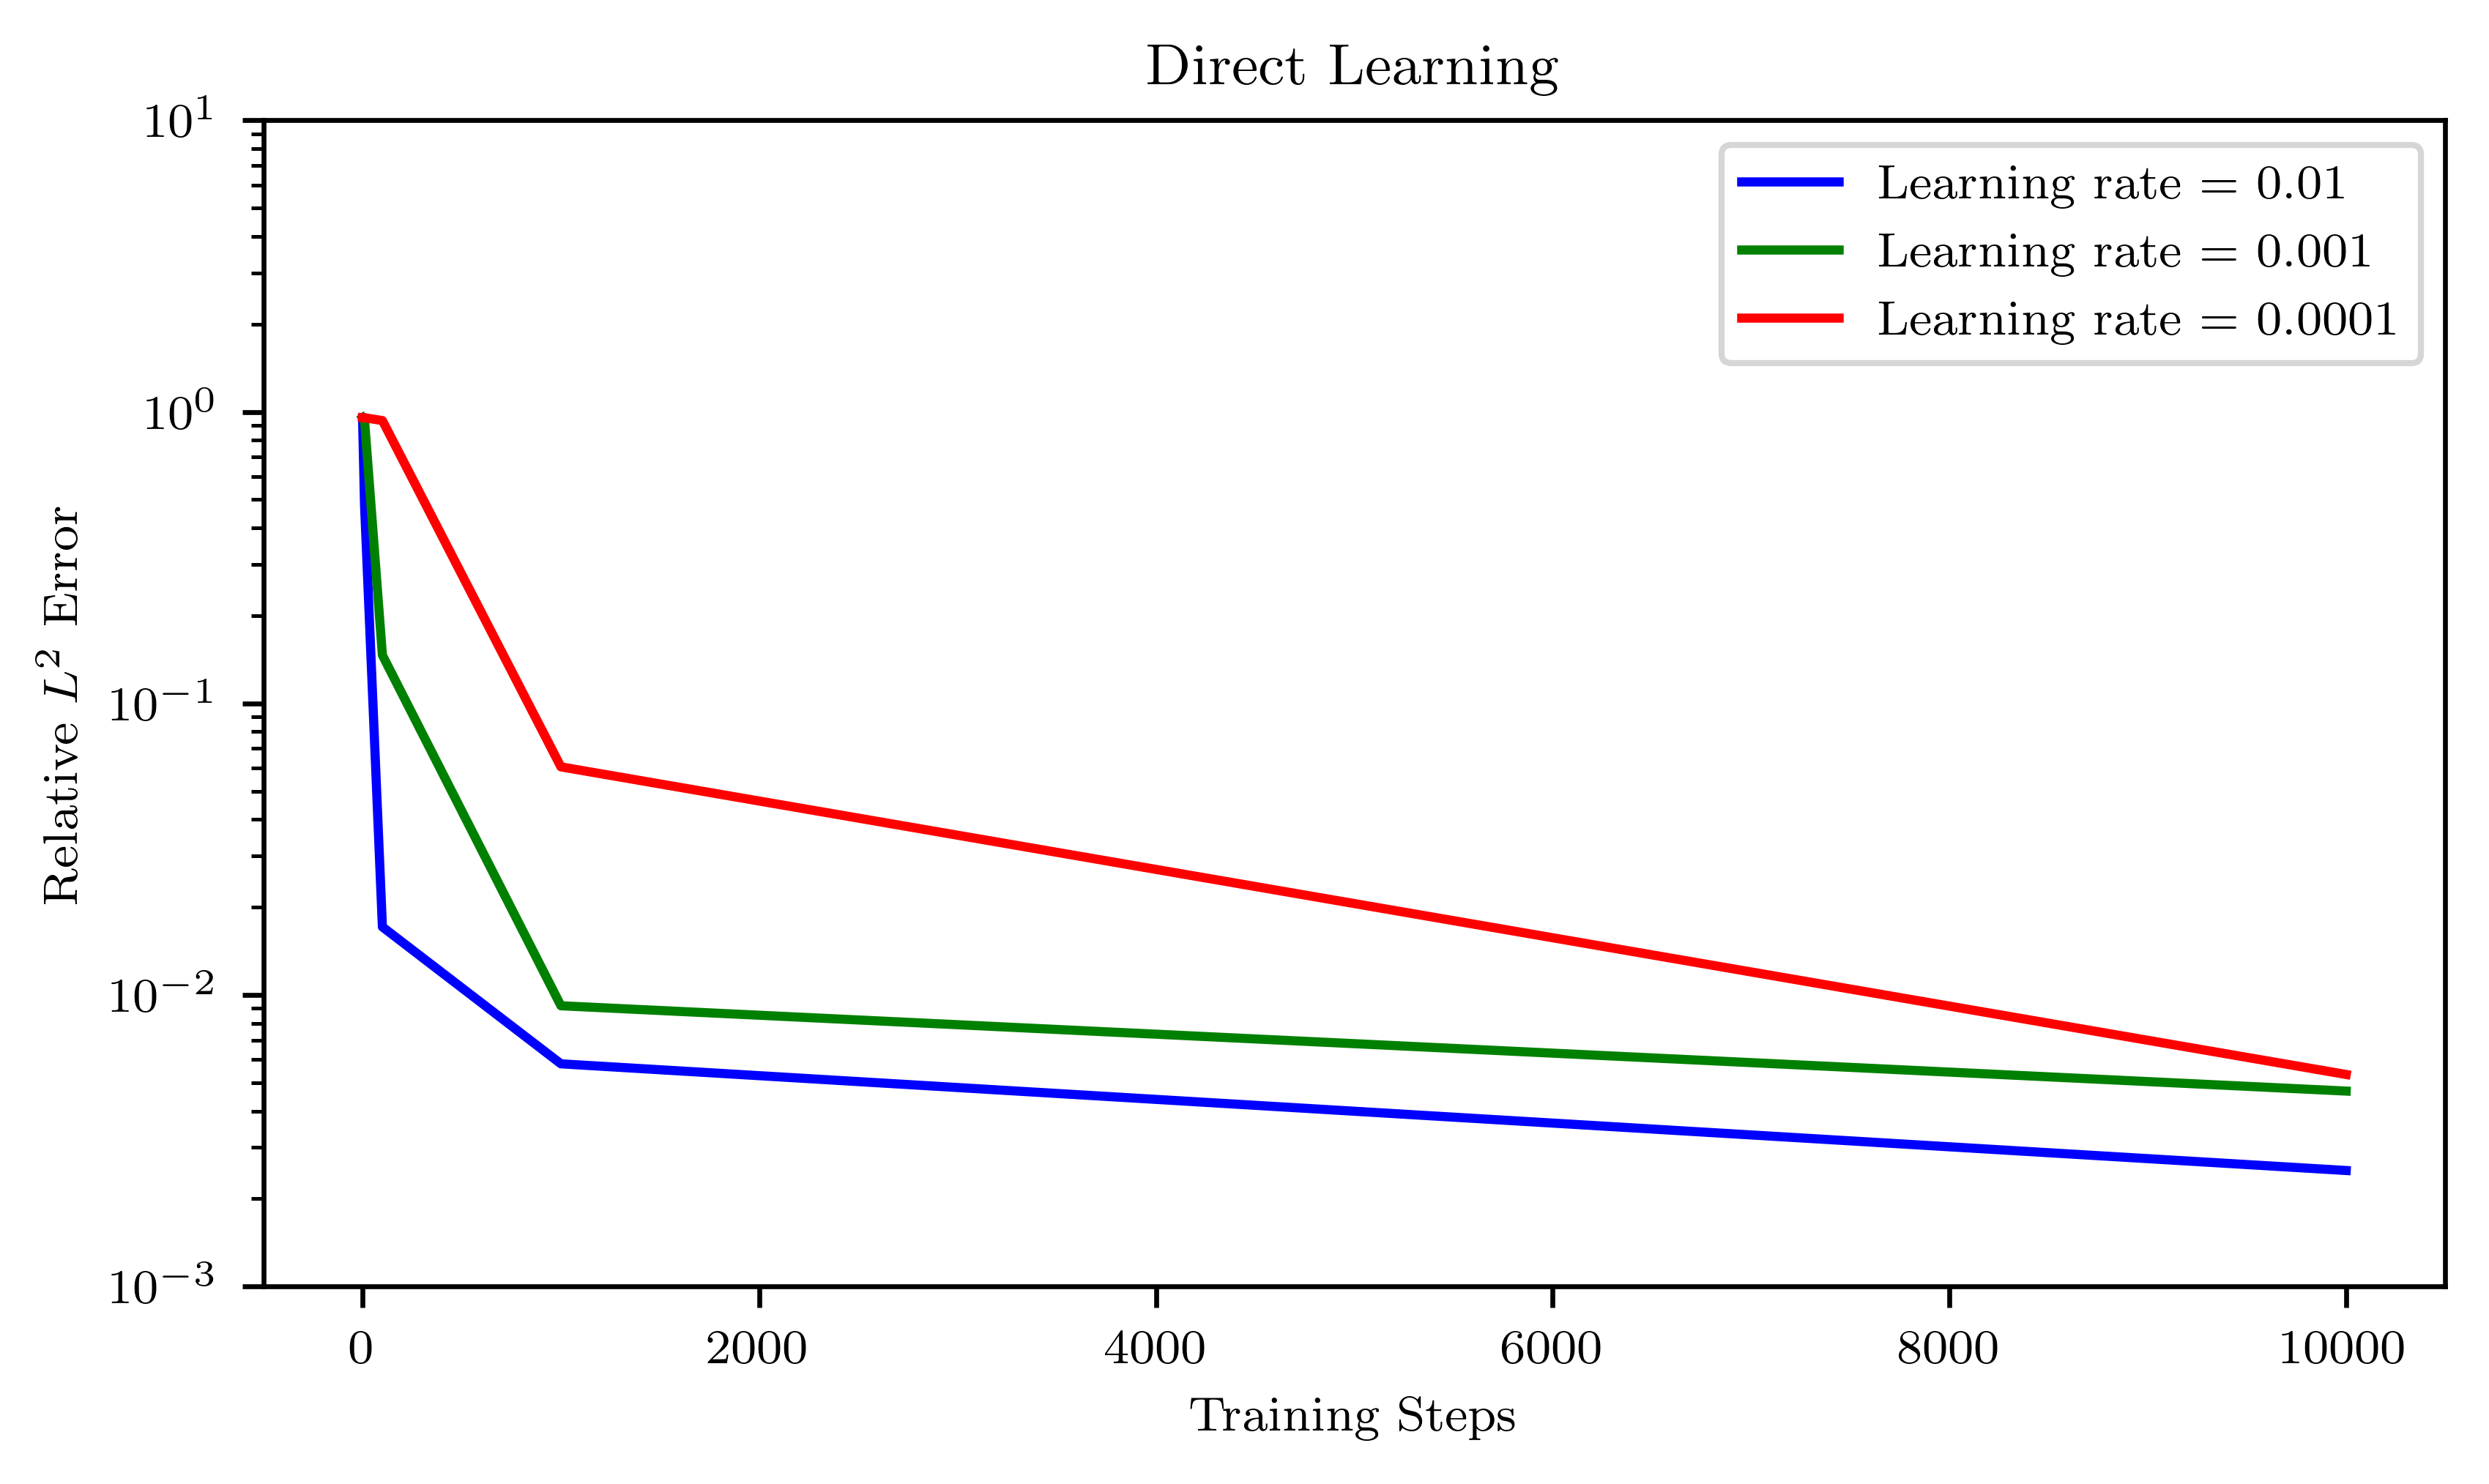

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title('Direct Learning')
ax.set_ylabel(r'Relative $L^2$ Error')
ax.set_xlabel('Training Steps')

ax.set_ylim(1e-3, 1e1)
ax.semilogy(steps, L2direct_errors1[steps],'b')
ax.semilogy(steps, L2direct_errors2[steps],'g')
ax.semilogy(steps, L2direct_errors3[steps],'r')

ax.legend(['Learning rate = 0.01', 'Learning rate = 0.001', 'Learning rate = 0.0001'])


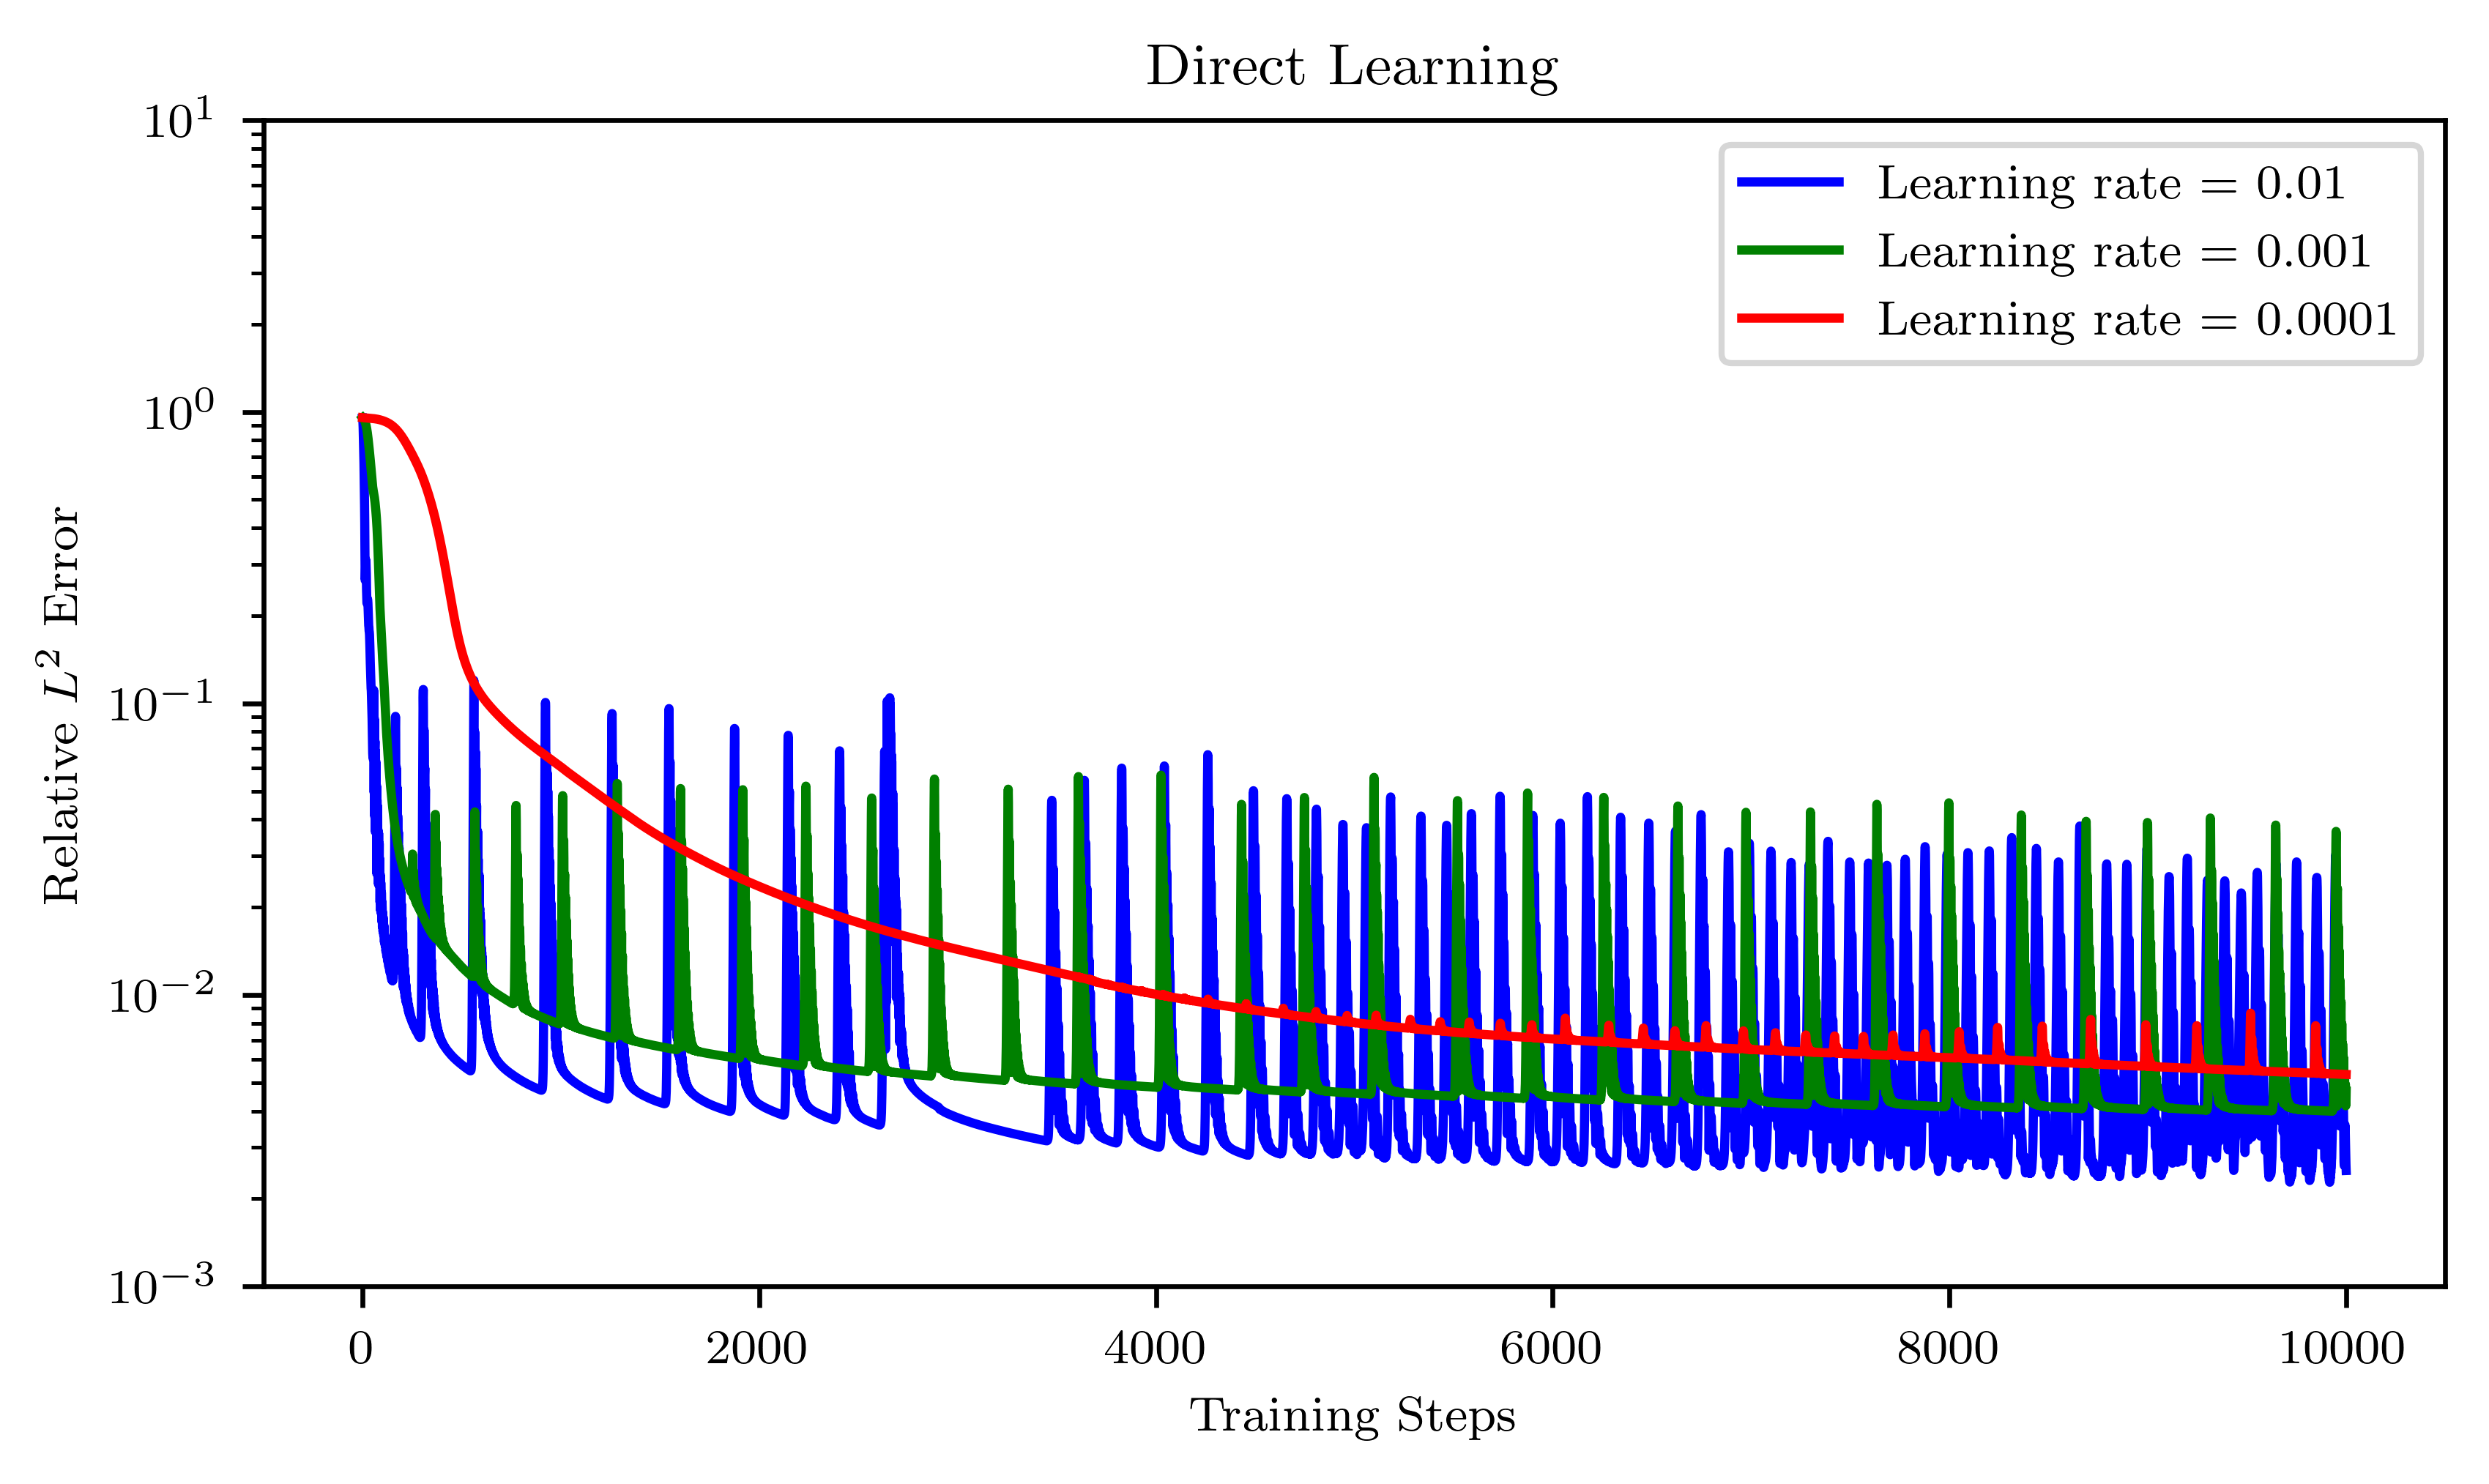

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title('Direct Learning')
ax.set_ylabel(r'Relative $L^2$ Error')
ax.set_xlabel('Training Steps')

ax.set_ylim(1e-3, 1e1)
ax.semilogy(range(10001), L2direct_errors1, 'b')
ax.semilogy(range(10001), L2direct_errors2, 'g')
ax.semilogy(range(10001), L2direct_errors3, 'r')

ax.legend(['Learning rate = 0.01', 'Learning rate = 0.001', 'Learning rate = 0.0001'])


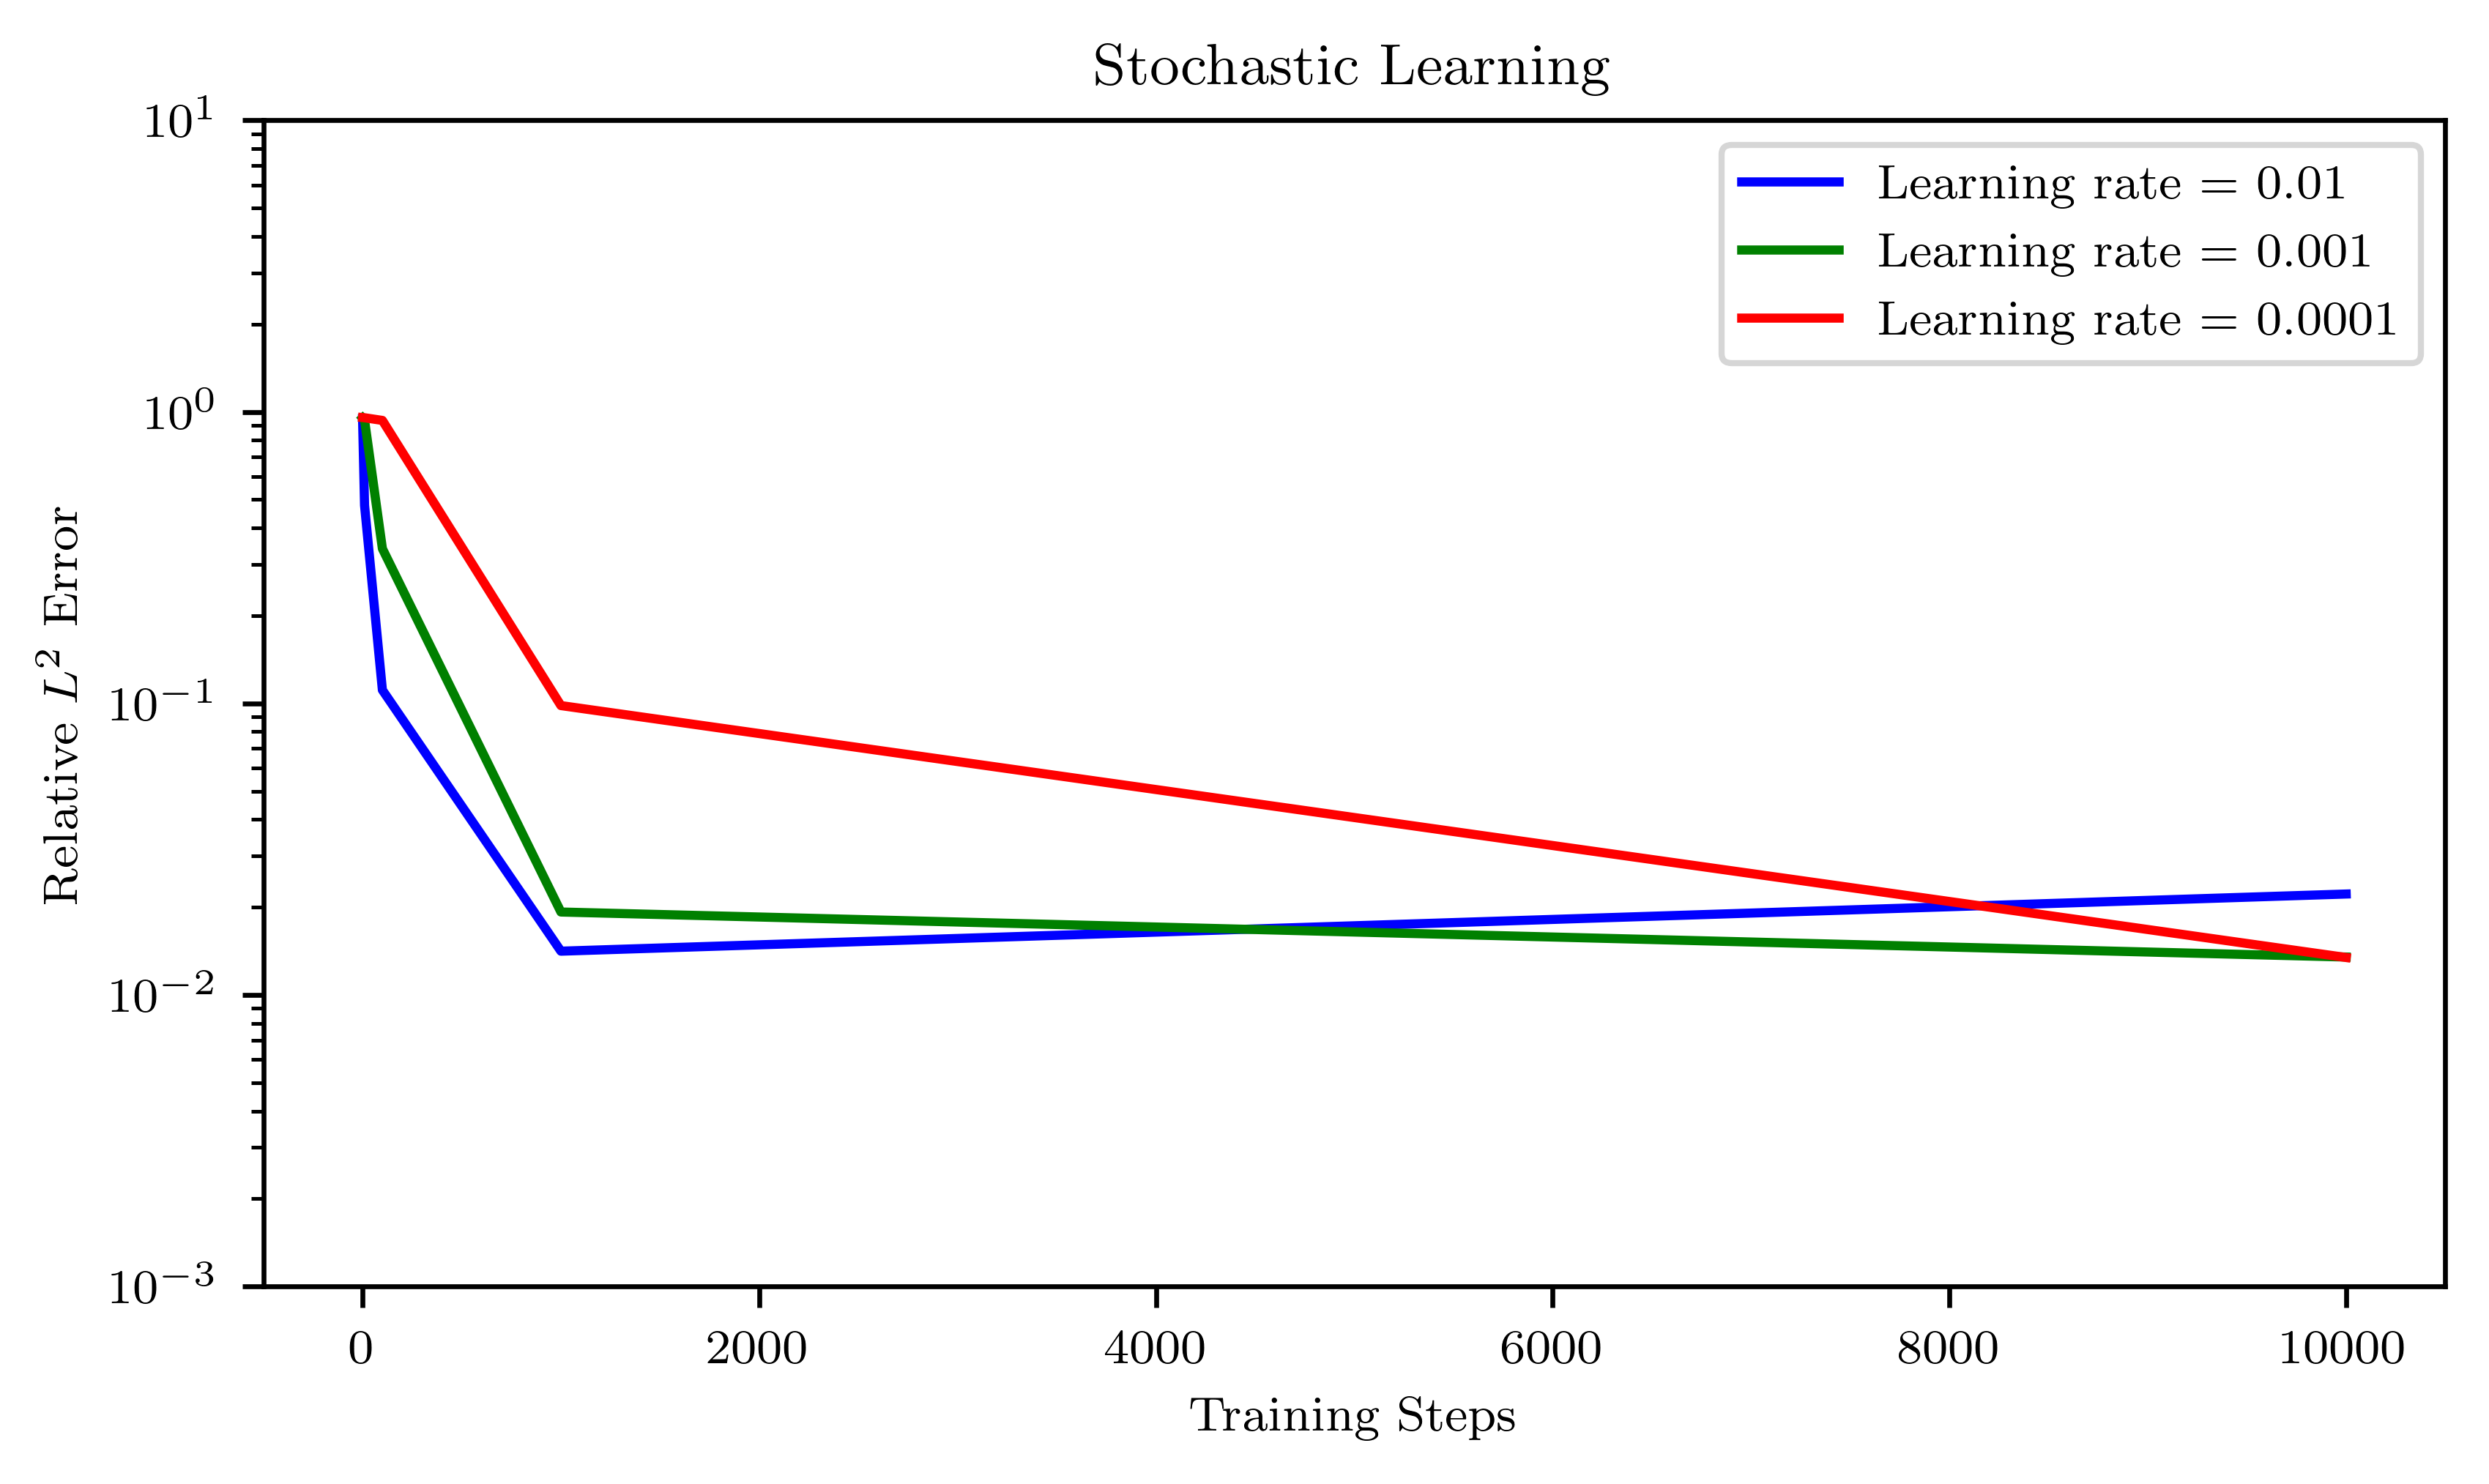

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title('Stochastic Learning')
ax.set_ylabel(r'Relative $L^2$ Error')
ax.set_xlabel('Training Steps')

ax.set_ylim(1e-3, 1e1)
ax.semilogy(steps, L2stochastic_errors1[steps],'b')
ax.semilogy(steps, L2stochastic_errors2[steps],'g')
ax.semilogy(steps, L2stochastic_errors3[steps],'r')

ax.legend(['Learning rate = 0.01', 'Learning rate = 0.001', 'Learning rate = 0.0001'])

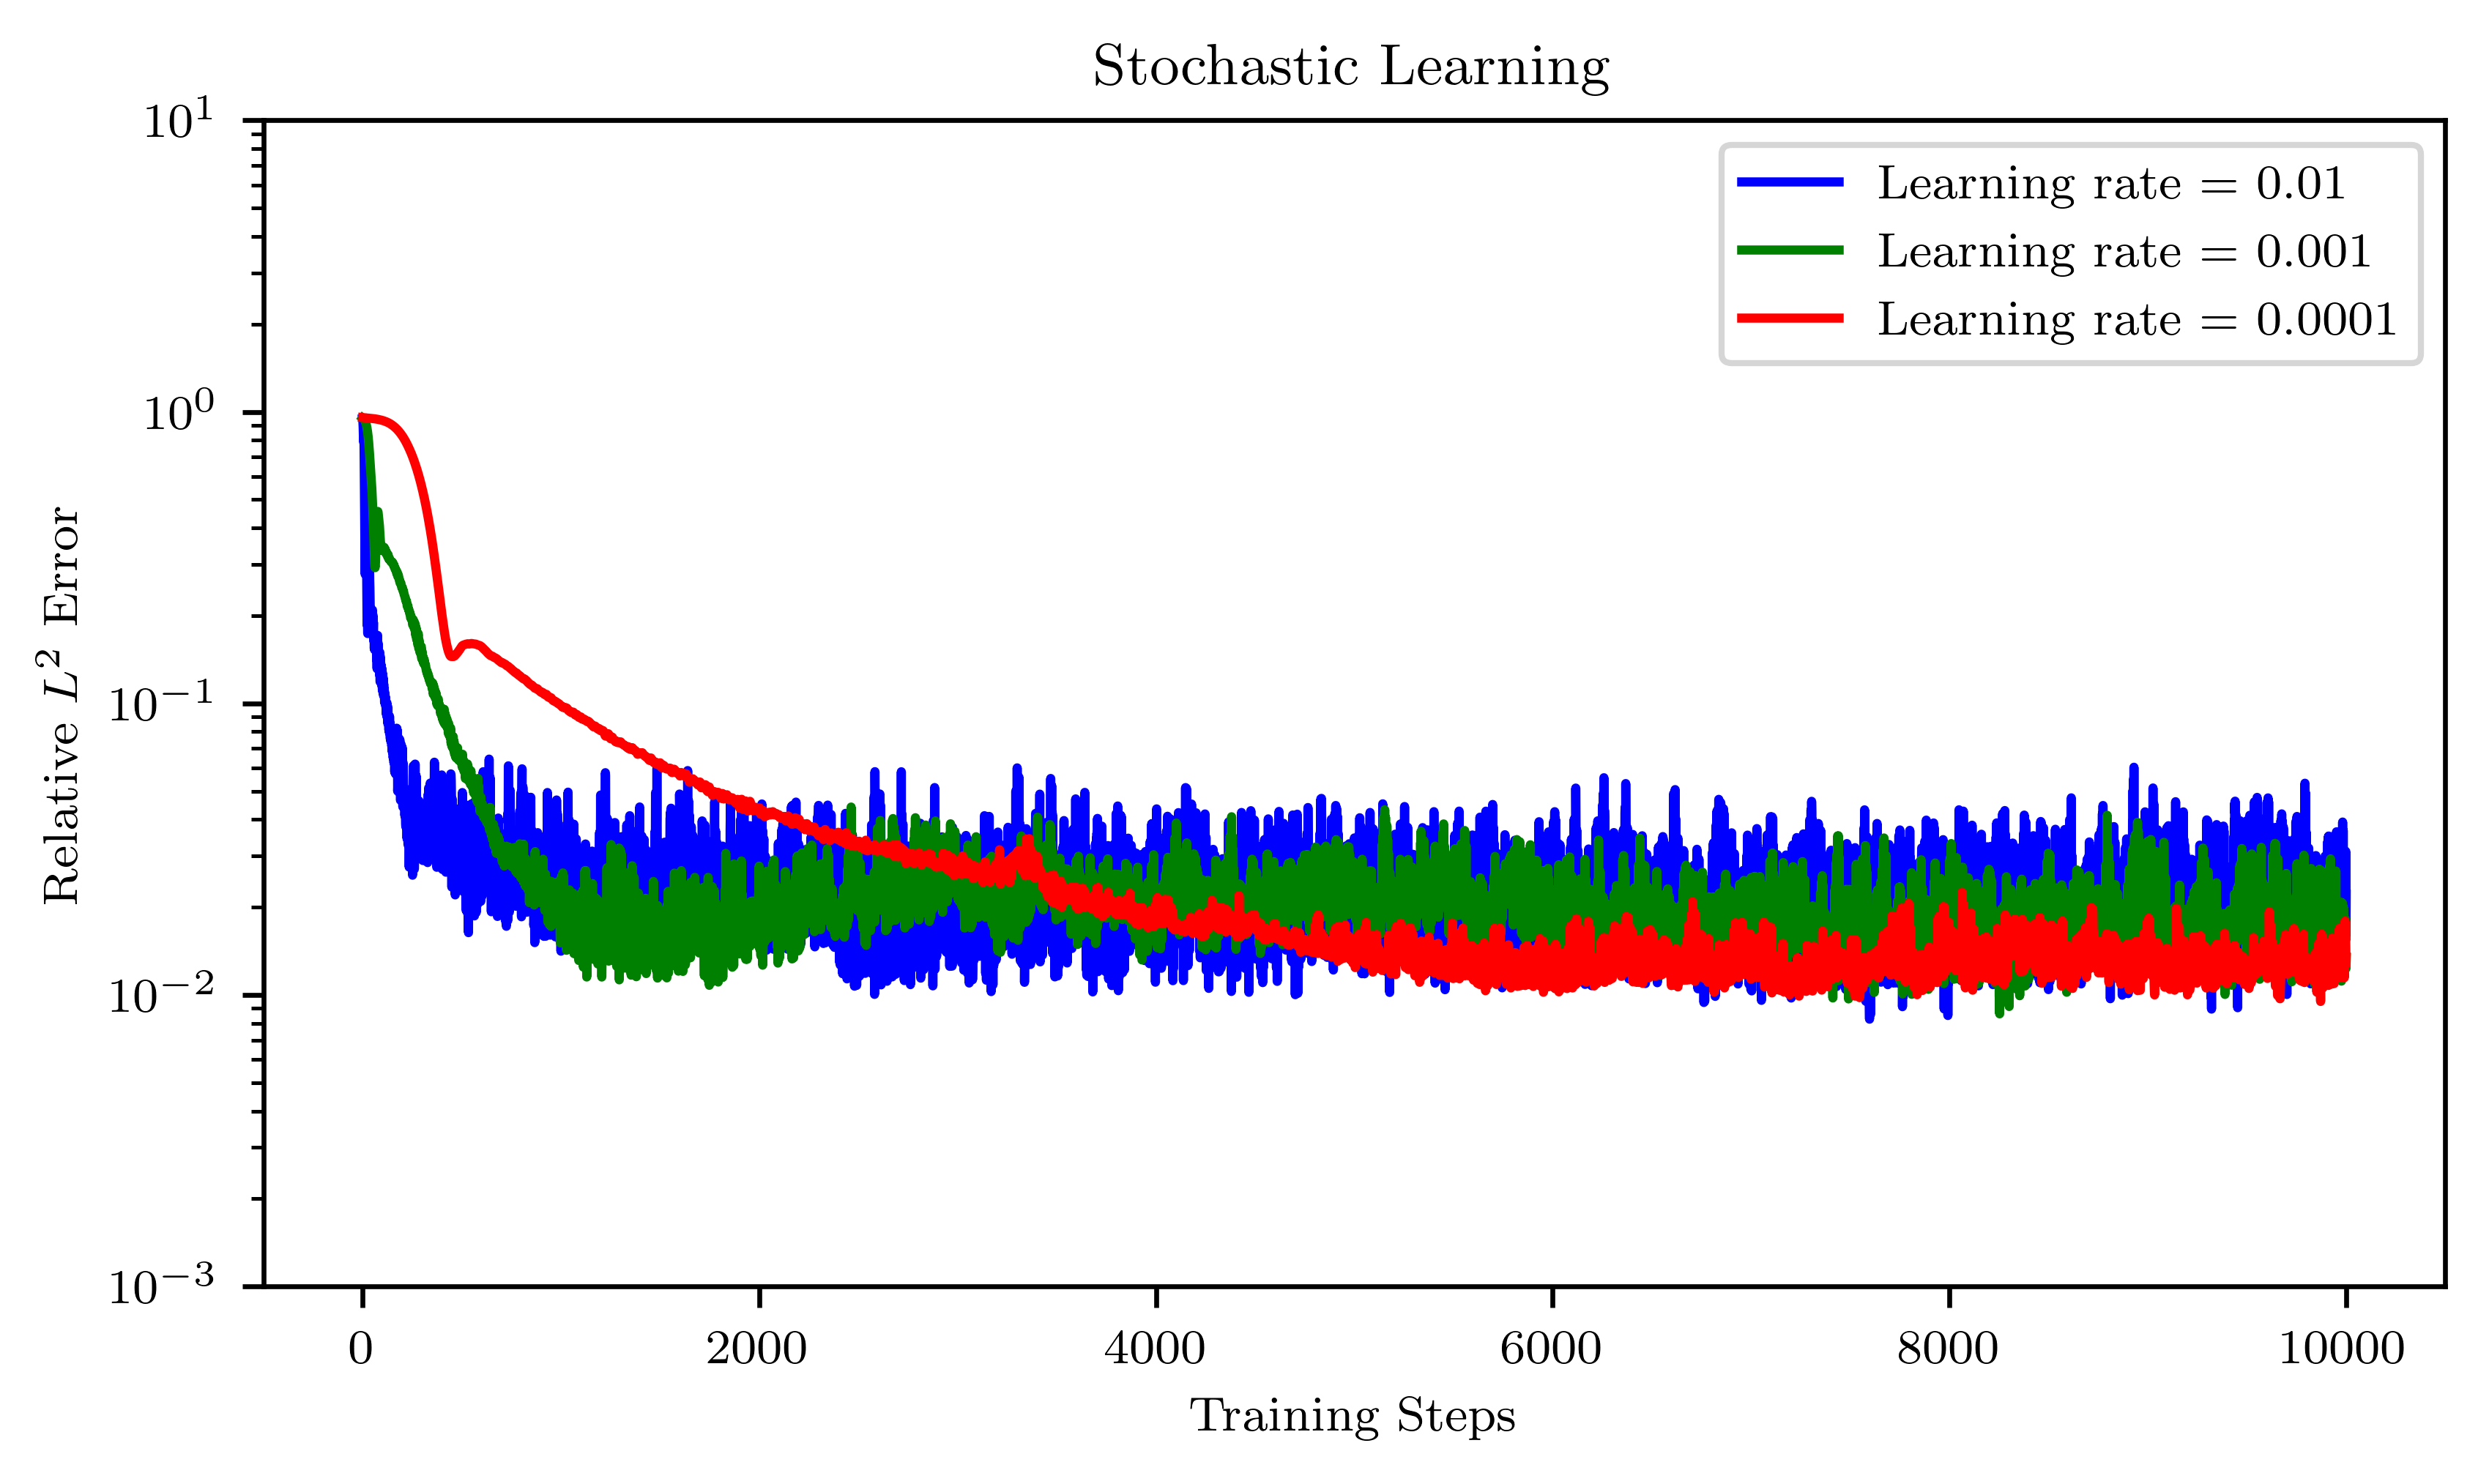

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title('Stochastic Learning')
ax.set_ylabel(r'Relative $L^2$ Error')
ax.set_xlabel('Training Steps')

ax.set_ylim(1e-3, 1e1)
ax.semilogy(range(10001), L2stochastic_errors1, 'b')
ax.semilogy(range(10001), L2stochastic_errors2, 'g',)
ax.semilogy(range(10001), L2stochastic_errors3, 'r')

ax.legend(['Learning rate = 0.01', 'Learning rate = 0.001', 'Learning rate = 0.0001'])

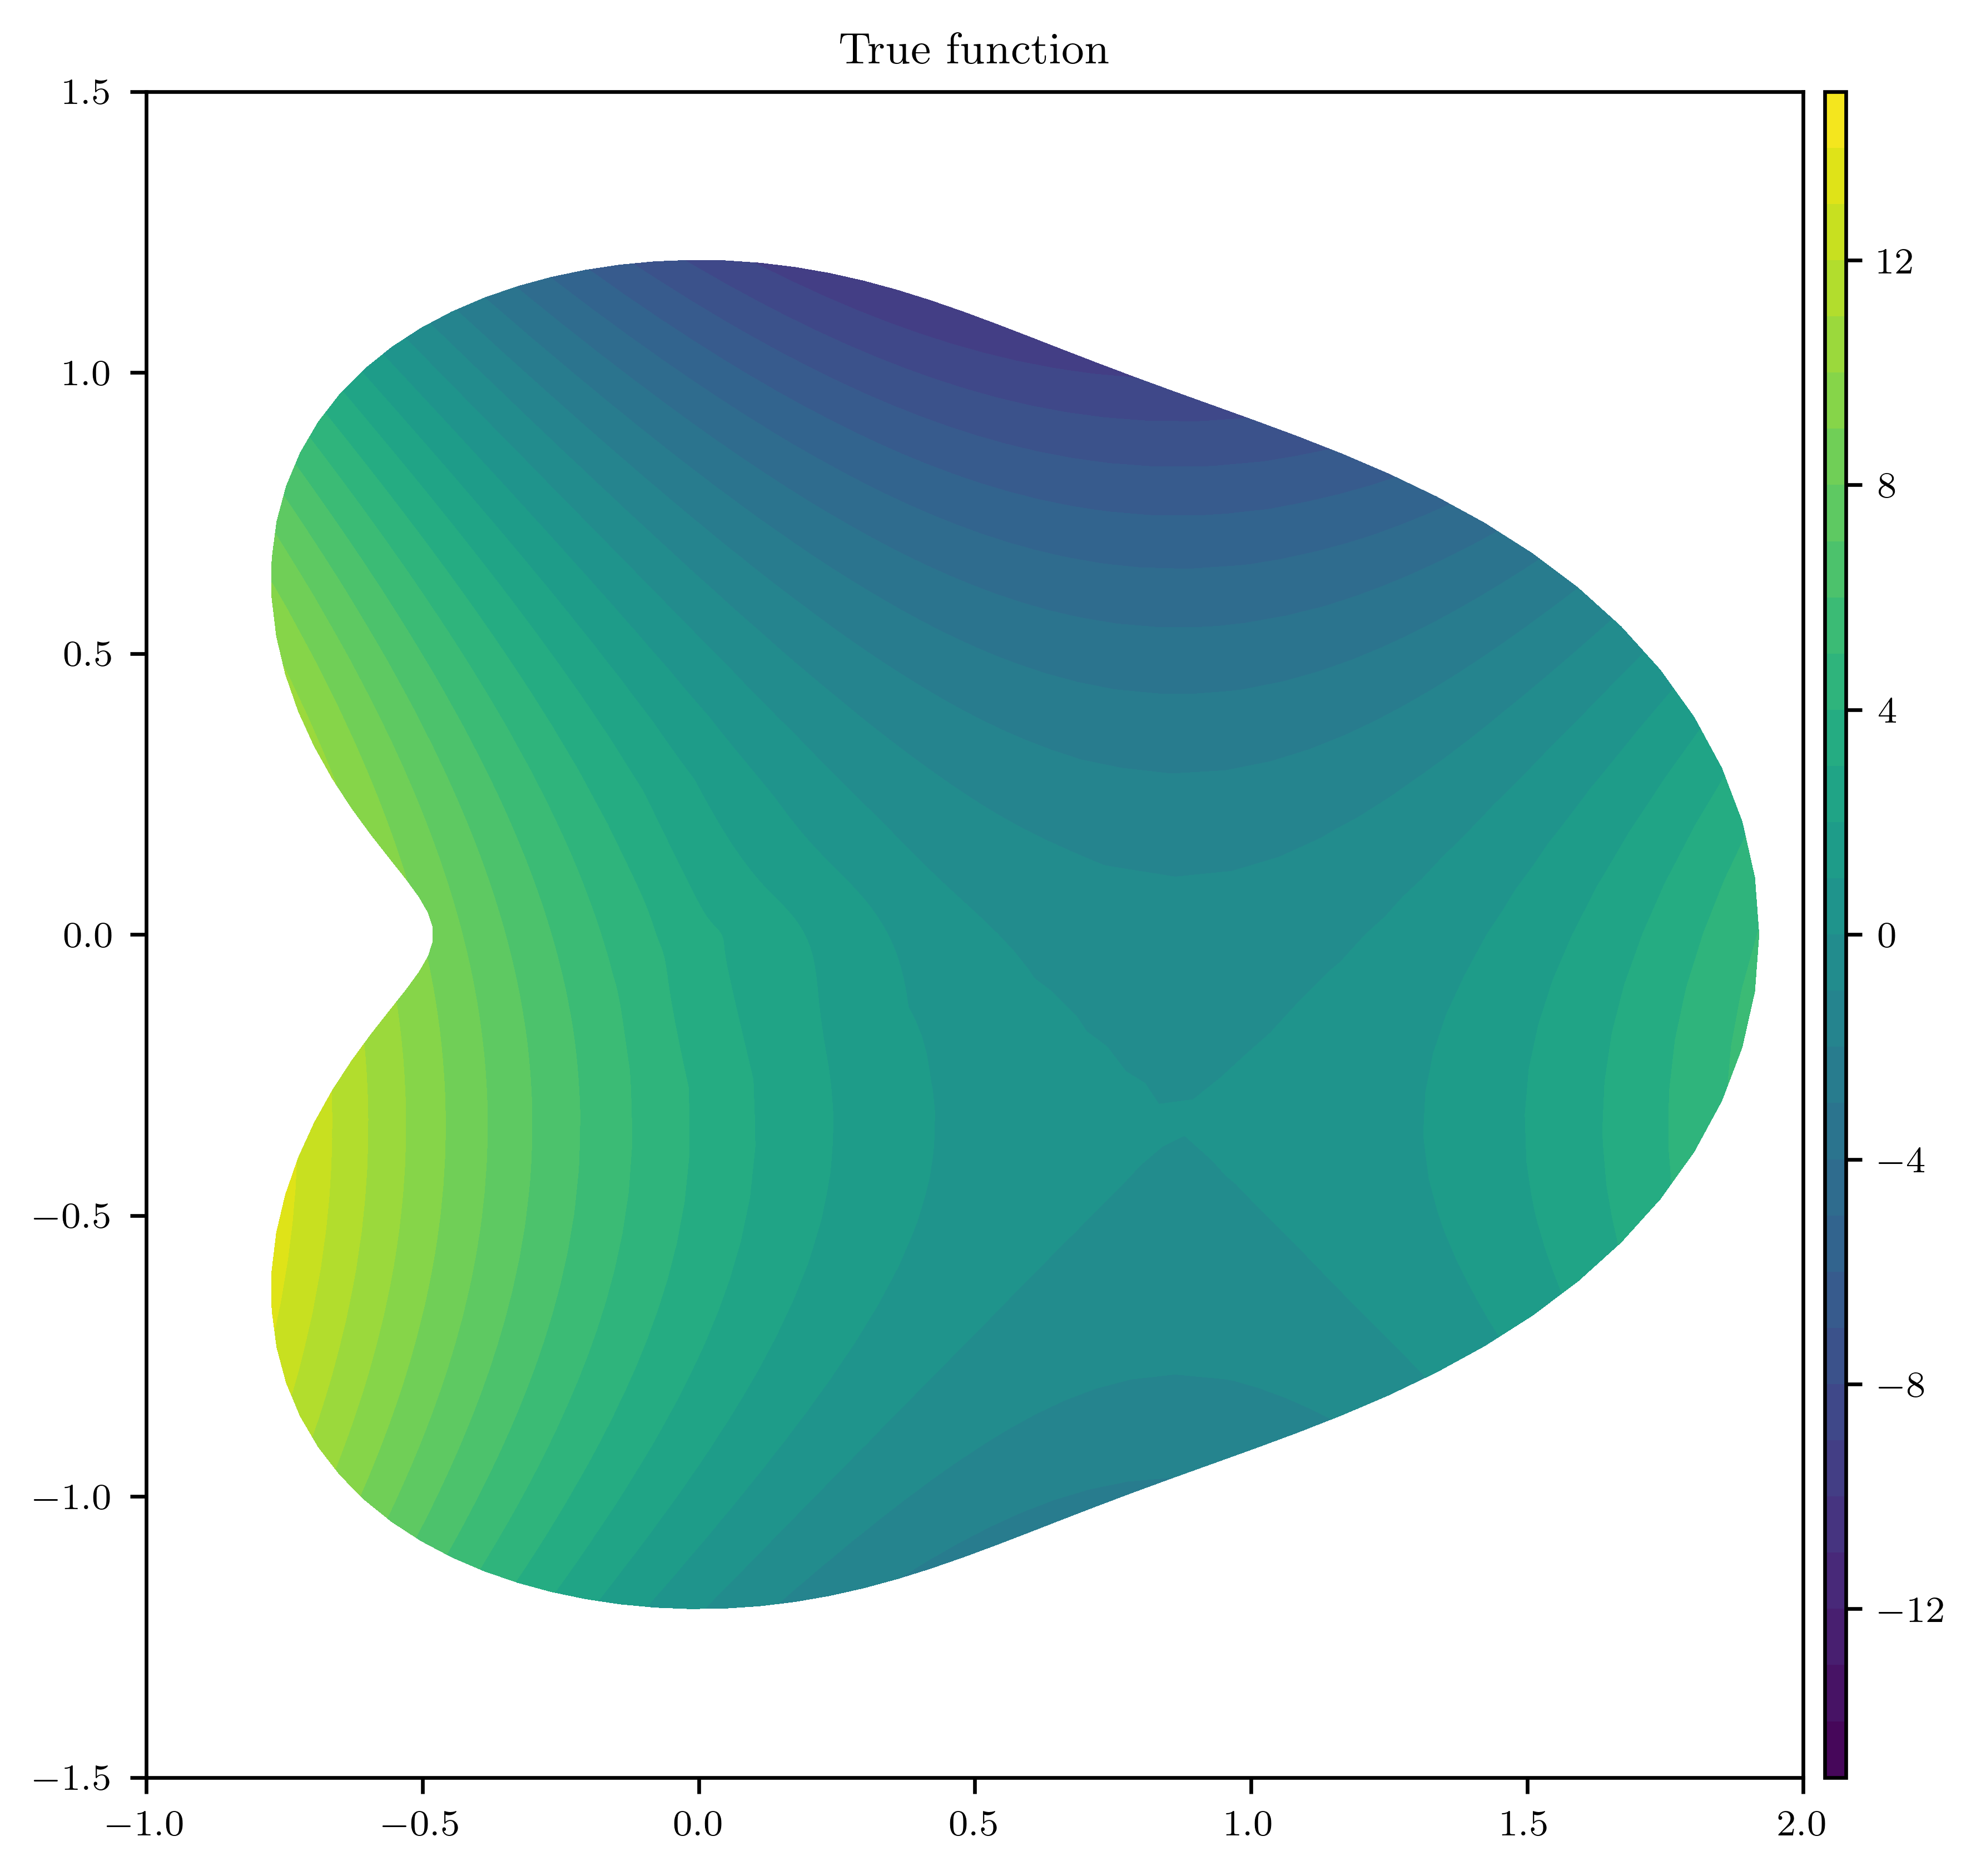

In [29]:
problem = importlib.import_module(".example1", package='examples')

true_fun = problem.true_fun
polar_eq = problem.polar_eq

num_th = 120
num_r = 20

th = torch.linspace(0,2*math.pi, num_th)
r = torch.zeros(num_r, num_th)
for ii in range(num_th):
    r[:,ii] = torch.sqrt( torch.linspace( 0, 1, num_r) )*polar_eq(th[ii])
r = r.reshape(-1)

rth = torch.stack((r, th.repeat(num_r)), dim=1)
X = torch.stack( (rth[:,0]*torch.cos( rth[:,1] ), rth[:,0]*torch.sin( rth[:,1])), dim=1)
#X = X[num_th-1:,:]
#size = num_th*(num_r-1) + 1 

Ytrue = true_fun(X).detach().reshape(num_r, num_th).numpy()

Xplot = X[:,0].detach().reshape(num_r, num_th).numpy()
Yplot = X[:,1].detach().reshape(num_r, num_th).numpy()

levels = np.linspace(-15, 15, 31)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4,6.4])

plt.tight_layout(pad=5.0)

ax.set_xlim(-1.0, 2.0)
ax.set_ylim(-1.5, 1.5)
ax.set_title('True function')
contour1 = ax.contourf( Xplot, Yplot, Ytrue, levels=levels, cmap=plt.cm.viridis)
colorbar1_param = fig.add_axes(
    [ax.get_position().x1 + 0.01,
     ax.get_position().y0,
     0.01,
     ax.get_position().height])
colorbar1 = plt.colorbar(contour1, cax = colorbar1_param)